In [1]:
import numpy as np
import pandas as pd


In [2]:
columns=pd.read_table("diabetes_data_upload.csv",delimiter=',')

In [50]:
columns.shape 

(520, 17)

In [3]:
columns.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [4]:
for col in columns.columns:
    if col!='Age' and col!='Gender' and col!='class':
        columns[col]=[1 if c=='Yes' else 0 for c in columns[col]]
    if col=='class':
        columns[col]=[1 if c=='Positive' else 0 for c in columns[col]]
    if col=='Gender':
        columns[col]=[1 if c=='Male' else 0 for c in columns[col]]


In [5]:
from sklearn import tree

In [94]:
dtr = tree.DecisionTreeRegressor(max_depth=100)

In [99]:
dtr.fit(columns.values[:,:15],columns.values[:,16])

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

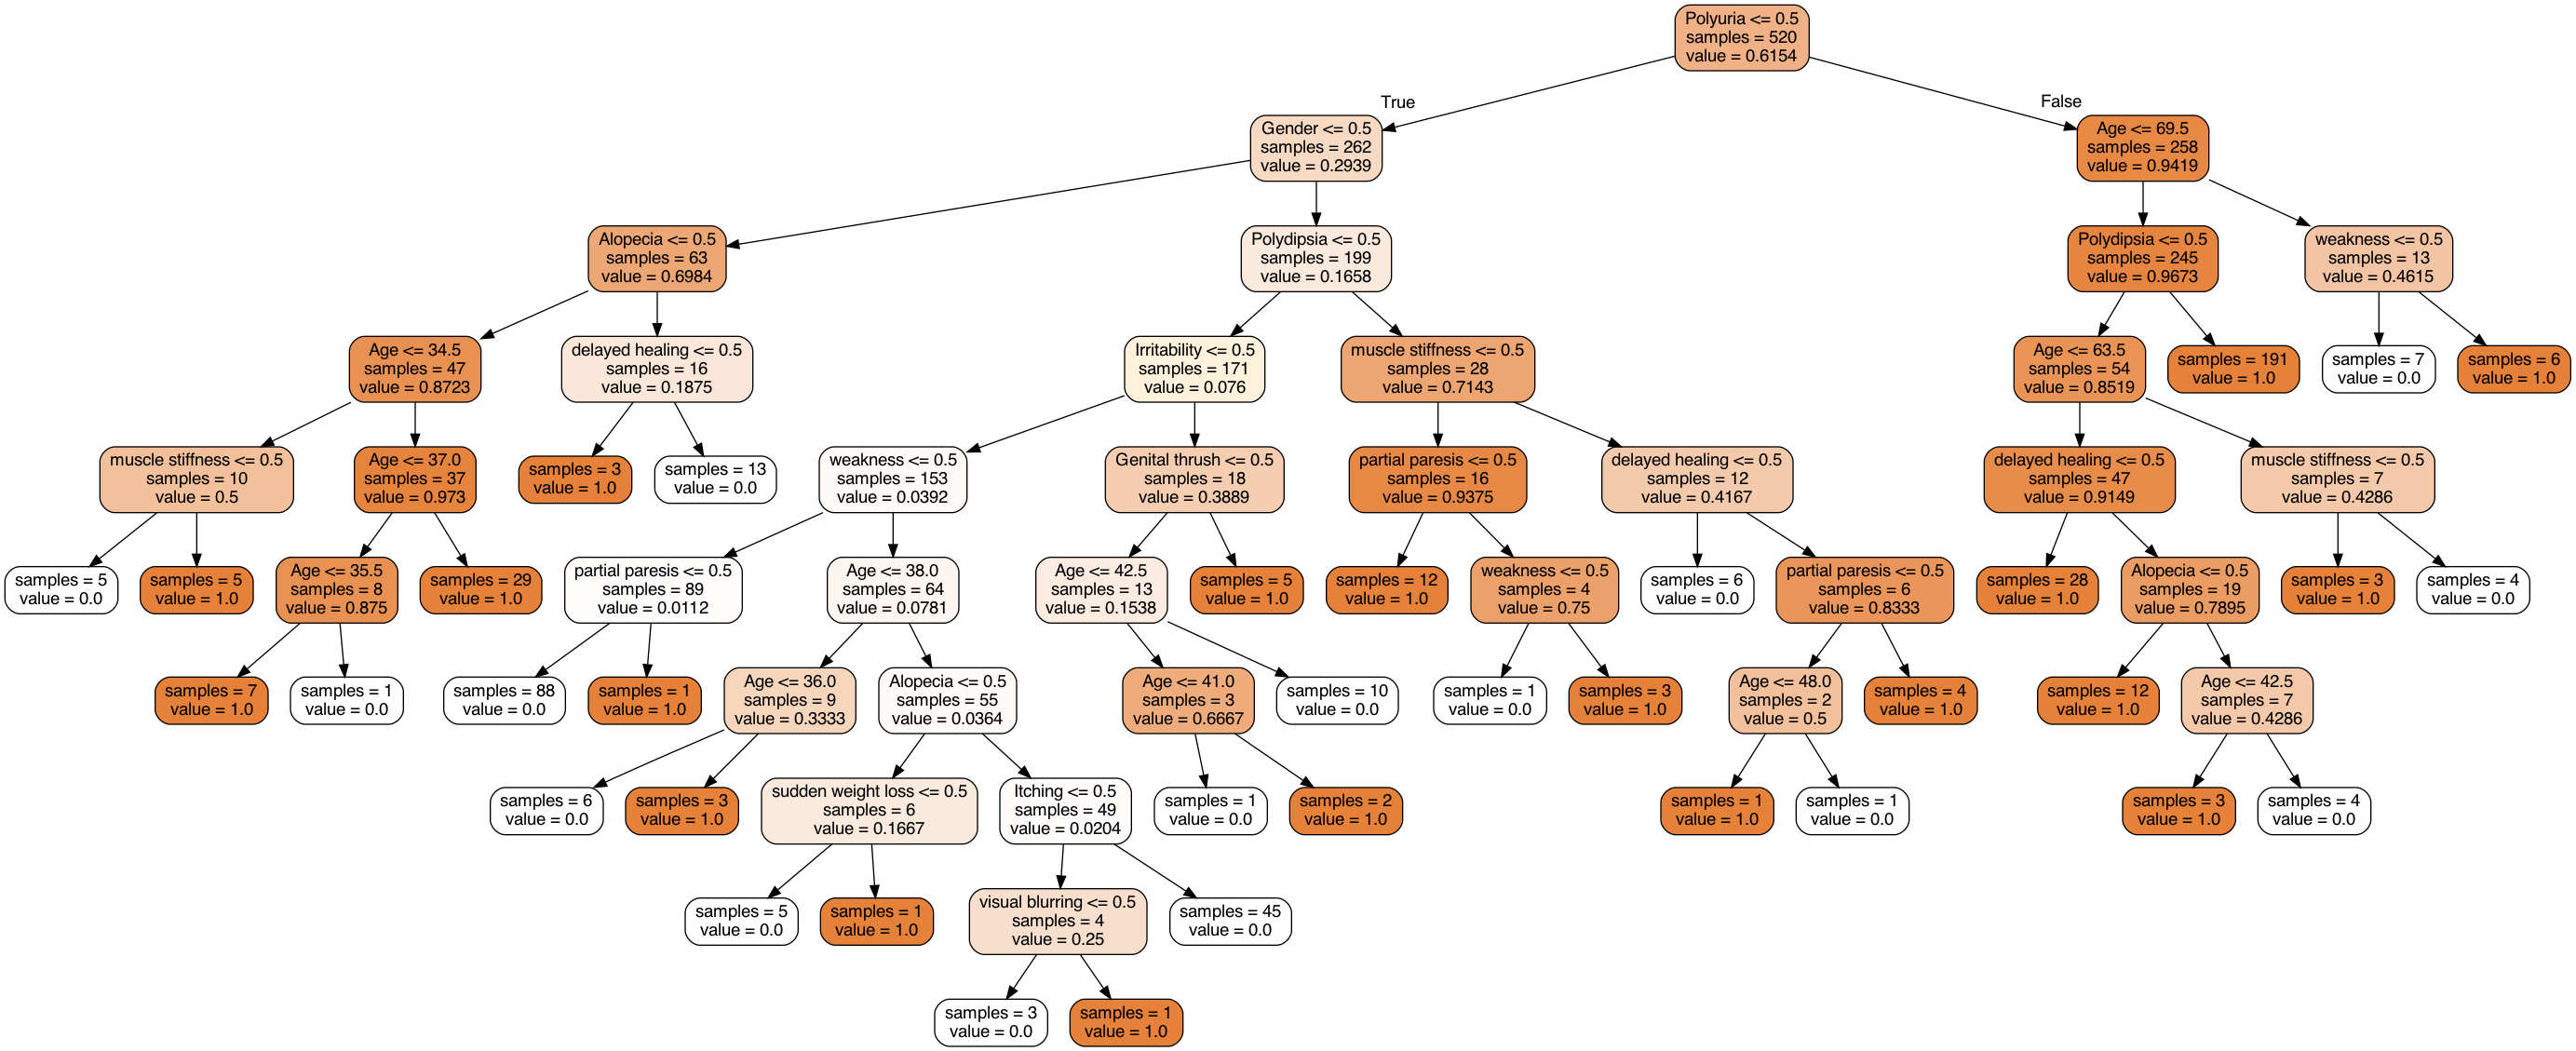

In [100]:

# dtr.fit(housing.data[:, [6, 7]], housing.target)
# dtr.fit()
dtr.fit(columns.values[:, :15], columns.values[:, 16])
dot_data = \
    tree.export_graphviz(
        dtr,
        out_file=None,
        feature_names=columns.columns,
        filled=True,
        impurity=False,
        rounded=True
    )
import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)
graph.get_nodes()[7].set_fillcolor("#FFF2DD")
from IPython.display import Image
Image(graph.create_png()) 

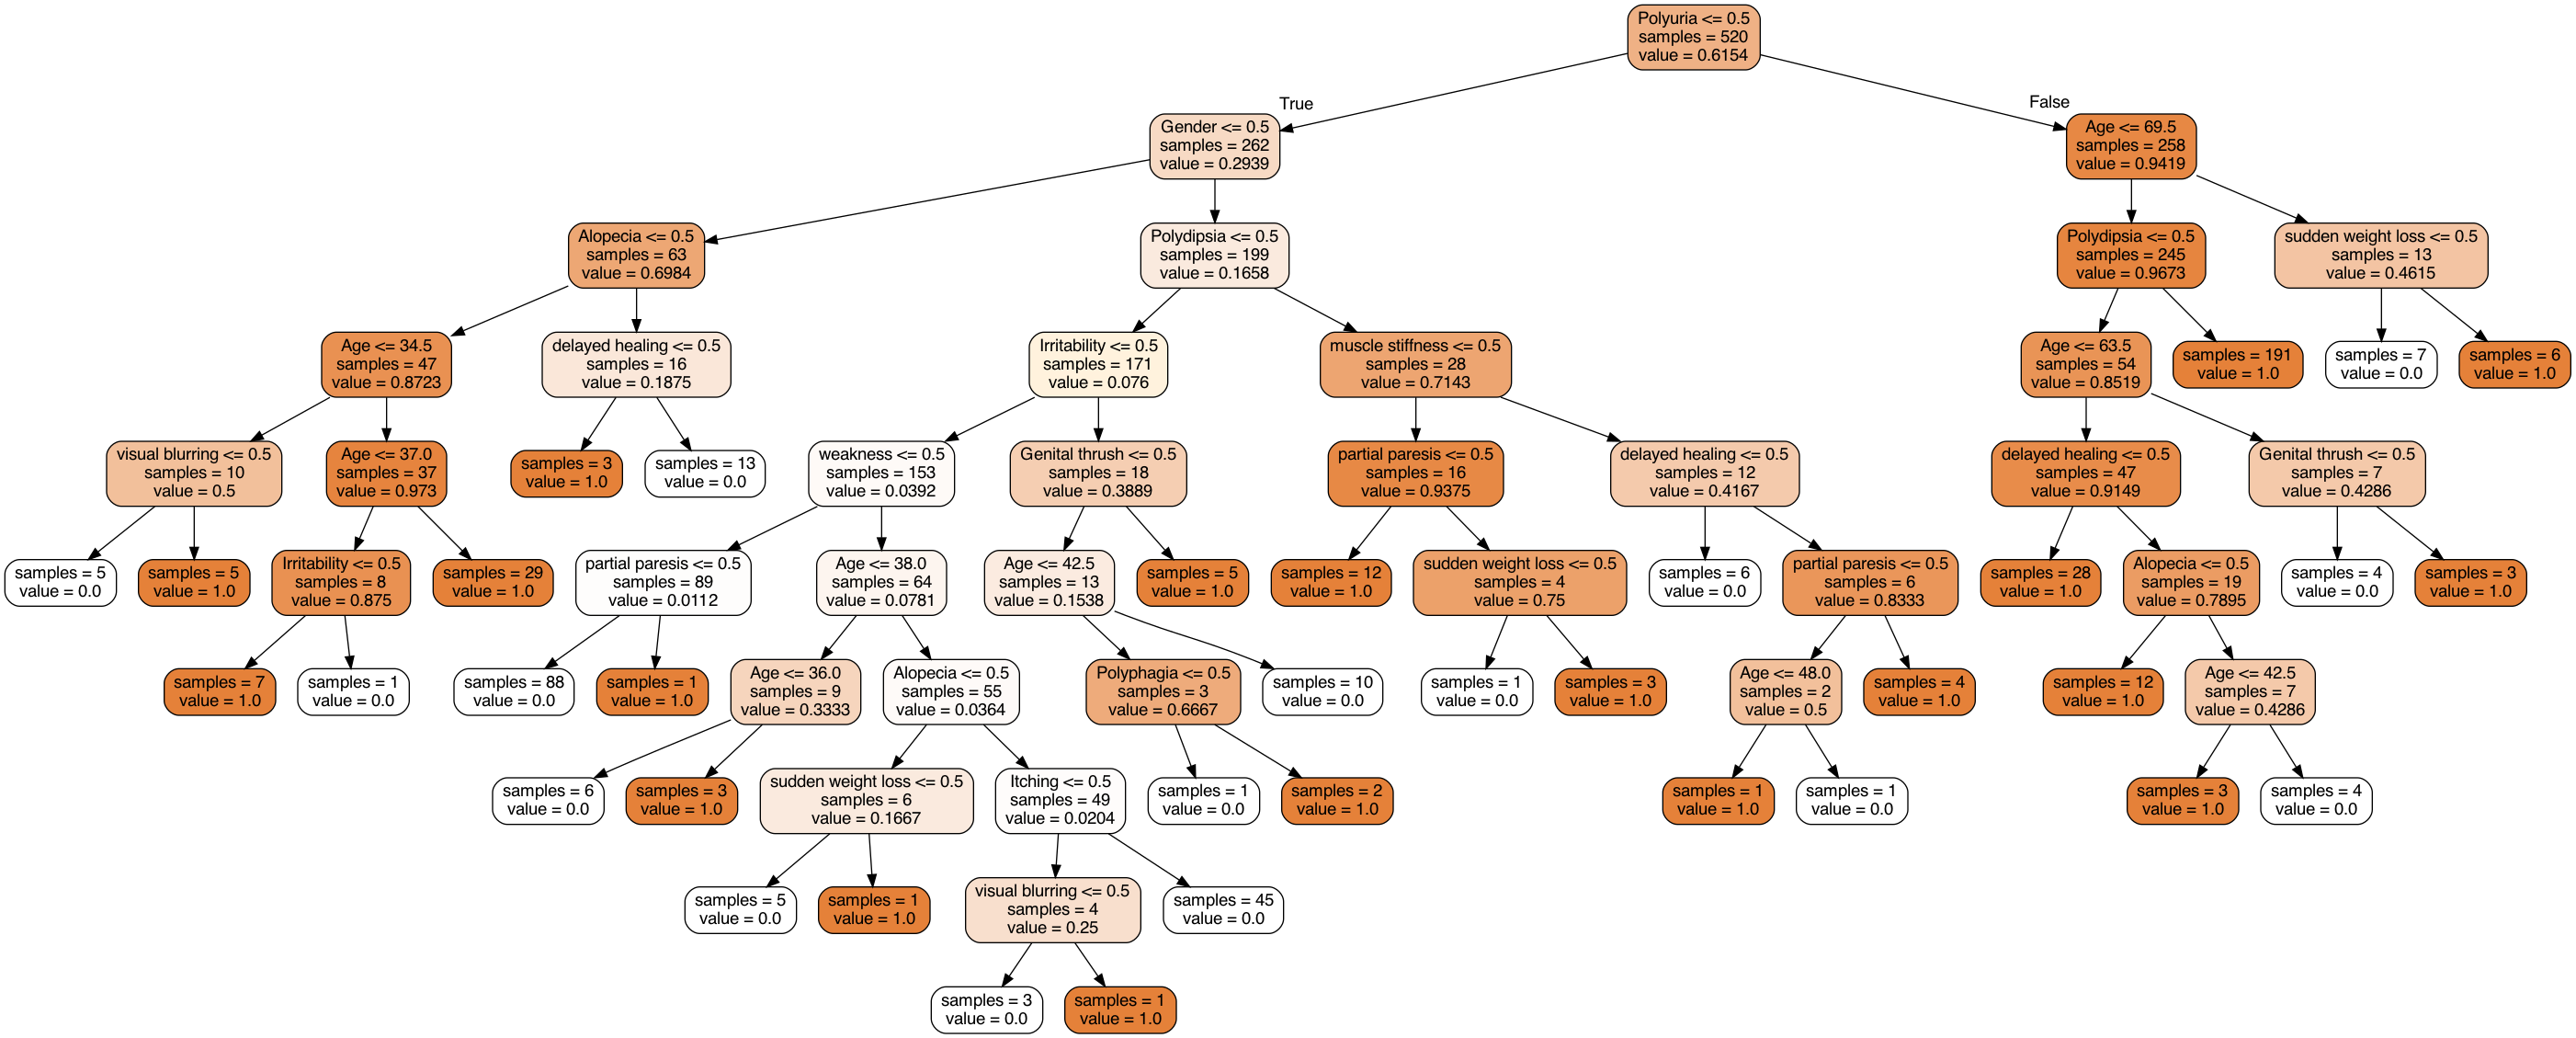

In [101]:
dtr = tree.DecisionTreeRegressor()
dtr.fit(columns.values[:,:15],columns.values[:,16])


dtr.fit(columns.values[:, :15], columns.values[:, 16])
dot_data = \
    tree.export_graphviz(
        dtr,
        out_file=None,
        feature_names=columns.columns,
        filled=True,
        impurity=False,
        rounded=True
    )
import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)
graph.get_nodes()[7].set_fillcolor("#FFF2DD")
from IPython.display import Image
Image(graph.create_png()) 

In [109]:
from sklearn.model_selection import train_test_split
data_train,data_test,target_train,target_test= train_test_split(columns.values[:,:15],columns.values[:,16],test_size=0.1,random_state=43)
dtr=tree.DecisionTreeRegressor(max_depth=10)

In [110]:
dtr.fit(data_train,target_train)

DecisionTreeRegressor(criterion='mse', max_depth=15, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [111]:
dtr.score(data_test,target_test)

0.8341307814992025

In [105]:
from sklearn.model_selection import train_test_split
data_train,data_test,target_train,target_test= train_test_split(columns.values[:,:15],columns.values[:,16],test_size=0.1,random_state=43)
dtr=tree.DecisionTreeRegressor()
dtr.fit(data_train,target_train)
dtr.score(data_test,target_test)

0.9170653907496013

In [16]:
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier 
rfr=RandomForestRegressor(random_state=42)
rfr.fit(data_train,target_train)
rfr.score(data_test,target_test)

/Users/nanji/miniconda3/envs/py35/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


0.8789154704944178

树模型参数:
1.criterion gini or entropy

2.splitter best or random 前者是在所有特征中找最好的切分点 后者是在部分特征中（数据量大的时候）

3.max_features None（所有），log2，sqrt，N 特征小于50的时候一般使用所有的

4.max_depth 数据少或者特征少的时候可以不管这个值，如果模型样本量多，特征也多的情况下，可以尝试限制下

5.min_samples_split 如果某节点的样本数少于min_samples_split，则不会继续再尝试选择最优特征来进行划分如果样本量不大，不需要管这个值。如果样本量数量级非常大，则推荐增大这个值。

6.min_samples_leaf 这个值限制了叶子节点最少的样本数，如果某叶子节点数目小于样本数，则会和兄弟节点一起被剪枝，如果样本量不大，不需要管这个值，大些如10W可是尝试下5

7.min_weight_fraction_leaf 这个值限制了叶子节点所有样本权重和的最小值，如果小于这个值，则会和兄弟节点一起被剪枝默认是0，就是不考虑权重问题。一般来说，如果我们有较多样本有缺失值，或者分类树样本的分布类别偏差很大，就会引入样本权重，这时我们就要注意这个值了。

8.max_leaf_nodes 通过限制最大叶子节点数，可以防止过拟合，默认是"None”，即不限制最大的叶子节点数。如果加了限制，算法会建立在最大叶子节点数内最优的决策树。如果特征不多，可以不考虑这个值，但是如果特征分成多的话，可以加以限制具体的值可以通过交叉验证得到。

9.class_weight 指定样本各类别的的权重，主要是为了防止训练集某些类别的样本过多导致训练的决策树过于偏向这些类别。这里可以自己指定各个样本的权重如果使用“balanced”，则算法会自己计算权重，样本量少的类别所对应的样本权重会高。

10.min_impurity_split 这个值限制了决策树的增长，如果某节点的不纯度(基尼系数，信息增益，均方差，绝对差)小于这个阈值则该节点不再生成子节点。即为叶子节点 。

n_estimators:要建立树的个数


进行参数的调整

使用 RandomForestRegressor 模型 

In [114]:
from sklearn.grid_search import GridSearchCV
tree_param_grid={'max_depth':list((4,8,16,32,64,128,256,512)),'n_estimators':list((2,4,8,16,32,64,128))}
grid=GridSearchCV(RandomForestRegressor(),param_grid=tree_param_grid,cv=5)
grid.fit(data_train,target_train)
grid.grid_scores_,grid.best_params_,grid.best_score_

([mean: 0.74126, std: 0.07943, params: {'n_estimators': 2, 'max_depth': 4},
  mean: 0.75517, std: 0.09030, params: {'n_estimators': 4, 'max_depth': 4},
  mean: 0.78710, std: 0.07273, params: {'n_estimators': 8, 'max_depth': 4},
  mean: 0.77359, std: 0.07262, params: {'n_estimators': 16, 'max_depth': 4},
  mean: 0.78113, std: 0.08773, params: {'n_estimators': 32, 'max_depth': 4},
  mean: 0.78877, std: 0.06490, params: {'n_estimators': 64, 'max_depth': 4},
  mean: 0.78231, std: 0.07088, params: {'n_estimators': 128, 'max_depth': 4},
  mean: 0.76128, std: 0.11451, params: {'n_estimators': 2, 'max_depth': 8},
  mean: 0.80978, std: 0.14372, params: {'n_estimators': 4, 'max_depth': 8},
  mean: 0.87129, std: 0.07785, params: {'n_estimators': 8, 'max_depth': 8},
  mean: 0.85438, std: 0.10158, params: {'n_estimators': 16, 'max_depth': 8},
  mean: 0.85707, std: 0.09550, params: {'n_estimators': 32, 'max_depth': 8},
  mean: 0.87333, std: 0.07774, params: {'n_estimators': 64, 'max_depth': 8},
  me

使用 RandomForestClassifier 模型 

In [115]:
from sklearn.grid_search import GridSearchCV
tree_param_grid={'max_depth':list((4,8,16,32,64,128,256,512)),'n_estimators':list((2,4,8,16,32,64,128))}
# grid=GridSearchCV(RandomForestClassifier(),param_grid=tree_param_grid,cv=5,scoring='roc_auc')
grid=GridSearchCV(RandomForestClassifier(),param_grid=tree_param_grid,cv=5)
grid.fit(data_train,target_train)
grid.grid_scores_,grid.best_params_,grid.best_score_

([mean: 0.90385, std: 0.01373, params: {'n_estimators': 2, 'max_depth': 4},
  mean: 0.89530, std: 0.03497, params: {'n_estimators': 4, 'max_depth': 4},
  mean: 0.90598, std: 0.03226, params: {'n_estimators': 8, 'max_depth': 4},
  mean: 0.93590, std: 0.01763, params: {'n_estimators': 16, 'max_depth': 4},
  mean: 0.91667, std: 0.02340, params: {'n_estimators': 32, 'max_depth': 4},
  mean: 0.92735, std: 0.01681, params: {'n_estimators': 64, 'max_depth': 4},
  mean: 0.93376, std: 0.02359, params: {'n_estimators': 128, 'max_depth': 4},
  mean: 0.94444, std: 0.03037, params: {'n_estimators': 2, 'max_depth': 8},
  mean: 0.94658, std: 0.02445, params: {'n_estimators': 4, 'max_depth': 8},
  mean: 0.96368, std: 0.02084, params: {'n_estimators': 8, 'max_depth': 8},
  mean: 0.96368, std: 0.03333, params: {'n_estimators': 16, 'max_depth': 8},
  mean: 0.97222, std: 0.02189, params: {'n_estimators': 32, 'max_depth': 8},
  mean: 0.97009, std: 0.03113, params: {'n_estimators': 64, 'max_depth': 8},
  me

In [116]:
rfr=RandomForestRegressor(max_depth=8, min_samples_split=6,n_estimators=16,random_state=42)
rfr.fit(data_train,target_train)
rfr.score(data_test,target_test)

0.8216382277559702

In [68]:
predicted_labels=rfr.predict(data_test)

In [63]:
predicted_labels

array([0.975     , 0.875     , 1.        , 1.        , 1.        ,
       1.        , 0.        , 1.        , 0.        , 0.        ,
       1.        , 0.975     , 1.        , 0.4375    , 0.07291667,
       0.        , 1.        , 1.        , 0.        , 1.        ,
       0.4375    , 0.        , 1.        , 0.97916667, 1.        ,
       0.        , 0.75      , 1.        , 1.        , 0.        ,
       1.        , 0.        , 0.02083333, 0.08333333, 0.03125   ,
       0.4375    , 0.95833333, 0.        , 0.171875  , 0.875     ,
       0.9375    , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.        , 1.        , 0.        ,
       1.        , 1.        ])

将得出的预测结果，按照四舍五入进行整理，得出精确度为1，这个结果比较尴尬 

In [54]:
predicted_labels=[int(np.around(c)) for c in predicted_labels]
accurary=len(predicted_labels==target_test)/len(predicted_labels)
accurary

1.0

In [24]:
rfr.score(data_test,target_test)

0.9423076923076923

In [37]:
caculate=pd.Series(rfr.feature_importances_,index=columns.columns.values[:15]).sort_values(ascending = False)

In [38]:
import matplotlib.pyplot as plt

In [39]:
rfr.feature_importances_

array([0.0856448 , 0.10443885, 0.21569829, 0.18933143, 0.05493663,
       0.03540934, 0.01816517, 0.02209062, 0.0277643 , 0.0287087 ,
       0.05246859, 0.02305005, 0.06421429, 0.02703967, 0.05103926])

In [40]:
fig,ax=plt.subplots()

In [41]:
len(rfr.feature_importances_)

15

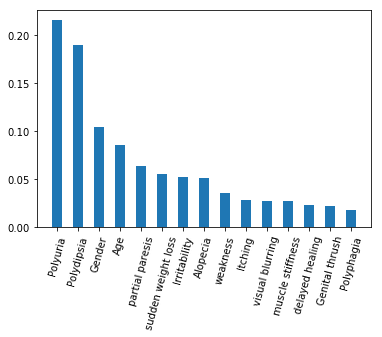

In [49]:
bar_positions=[c+0.75  for c in range(len(rfr.feature_importances_))] 

fig, ax = plt.subplots()
# ax.bar(bar_positions,rfr.feature_importances_,0.5 )
ax.bar(bar_positions,caculate.values ,0.5 )
ax.set_xticks(bar_positions)
ax.set_xticklabels(caculate.index.values ,rotation=75)
plt.show()

In [46]:
caculate.values  

array([0.21569829, 0.18933143, 0.10443885, 0.0856448 , 0.06421429,
       0.05493663, 0.05246859, 0.05103926, 0.03540934, 0.0287087 ,
       0.0277643 , 0.02703967, 0.02305005, 0.02209062, 0.01816517])

In [48]:
caculate.index.values 

array(['Polyuria', 'Polydipsia', 'Gender', 'Age', 'partial paresis',
       'sudden weight loss', 'Irritability', 'Alopecia', 'weakness',
       'Itching', 'visual blurring', 'muscle stiffness',
       'delayed healing', 'Genital thrush', 'Polyphagia'], dtype=object)

In [43]:
columns.columns.values[:15]

array(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia'], dtype=object)

In [117]:
a=columns['Gender']==0

In [119]:
columns[columns['Gender']==0]

In [120]:
b.shape

(192, 17)

In [122]:
c =[b['class']==1]

In [124]:
len(c)/len(a)

0.0019230769230769232